# Data Mining Course Spark Exercise
## Sharif University of Technology

In this notebook we are going to analyze farsi news. 
Outline of the exercise:
* Dataset preparation
* Preprocessing 
* Exploration 
* Word Collections

You should replace the `TODO` parts with your implementation. Remeber that each `TODO` may take multiple lines and you shouldn't limit your self to one-line codes.

## Prerequisites
You should be faimilar with [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). In this notebook you should use the following formula for tf-idf:
$$f_{t,d}/len(d) \times log(1 + \frac{N}{n_t})$$

## Warning: RDD api only
You **can not** use Dataframe, Dataset, mllib, ml, ... apis of spark in this exercise. You should only use the [RDD api](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html#pyspark.RDD).

# Please enter your name below:
# Name:
# Student Number:

# Section 1: Dataset prepartition
This section you need to download [dataset](https://drive.google.com/file/d/1bRxHQDzPr6wDimbM7b89H47kH8O3YV8Y/view?usp=sharing) in a directory you work. After that run the below cell to untar the datase.

**Note 1: Don't change the below command.**

**Note 2: If you use Windows OS, unzip the dataset manually.**

## Install Pypark & Initialization
Uncomment this section if you use google colab or local pc

In [1]:
#! pip install pyspark
import pyspark

In [2]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession \
    .builder \
    .appName("HW1") \
    .master("local[*]") \
    .getOrCreate()

sc:SparkContext=spark.sparkContext

23/12/19 03:56:04 WARN Utils: Your hostname, aac resolves to a loopback address: 127.0.1.1; using 172.27.171.205 instead (on interface wlp2s0)
23/12/19 03:56:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/19 03:56:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Reading the data

In [3]:
news_rdd = sc.textFile("sample.txt")

# Section 2: Preprocessing
This section we try to normalize news and remove useless characters (for example /n and /u200c and ...). Also find and remove stop words.

In [4]:
import json
json_rdd = news_rdd.map(lambda x: json.loads(x))

In [5]:
import re
def remove_useless_characters(x):
    useless_charaters = r'[[a-zA-Z]!@#$%^&*()،.؟":{}|<>1234567890\n\u200c۱۲۳۴۵۶۷۸۹۰]'
    x['body'] = re.sub(r'[^آ-ی ]', "", x['body'])
    return x

"""
TODO
Step 1: Remove useless charachters.
Step 2: Find and Remove stop words.
"""
clean_news_rdd = json_rdd.map(lambda x: remove_useless_characters(x)) #TODO: remove useless charachters


In [6]:
def remove_stop_words(x):
    stop_words = ["و", "کرد", "شده", "گفت", "در", "به", "از", "که", "این", "را", "با", "های", "برای", "تا", "ها", "است", "یا", "اما", "هم", "نه", "یک",
    "خود", "یکی", "بود", "شد", "می", "شود", "کرد", "او", "ما", "شما", "آن", "آنها", "ایشان", "با", "در", "بر", "برای",
    "به", "روی", "زیر", "بالا", "جلوی", "پشت", "پنجره", "دنبال", "جلو", "پیش", "پس", "نزدیک", "دور", "برخی", "چند",
    "چنین", "چه", "چون", "چگونه", "کجا", "کدام", "که", "کدامین", "کدامیک", "کدامیکی", "کجا", "کی", "چرا", "چطور", "چندین",
    "چند", "چنین", "کسی", "کس", "کدامیک", "کدامین", "کدامیکی", "کدام", "اینکه", "آنکه", "ولی", "اما", "اگر", "هر", "هرکس",
    "هرچه", "همان", "تنها", "وقتی", "تا", "تازه", "الان", "همیشه", "هنوز", "همین", "اول", "حالا", "پیش", "پس", "بار",
    "بارها", "همچنین", "نه", "نیز", "بلکه", "بله", "بلکه", "بلکه", "آره", "آری", "آره", "آری", "آره", "آری", "آره",
    "آری", "هم", "دیگر", "هم", "دیگران", "دیگری", "دیگه", "دیگه", "دیگران", "دیگری", "جلو", "پیش", "پس", "بالا", "پایین"]
    x['body'] = " ".join([word for word in x['body'].split() if word not in stop_words])
    return x
processed_news_rdd = clean_news_rdd.map(lambda x: remove_stop_words(x)) #TODO: find and remove stopwords.


# Section 3: Exploration
Please answer the following questions regarding the dataset:
- what are the titles and urls of 5 longest news?
- what are the 20 most frequent words? (Plot the distribution of these words)
- find the `word clouds` of the news.
    - you need to use `keywords` field.
    - score = $2^{log_{10}(count)}$ ( count is the number of the each keyword)
    - you should normalize scores.
    - use ***wordcloud*** package for showing the result.
- plot a timeline which shows total count of news per each day.
- plot a timeline which shows total count of news per each day that have at least one of the word clouds.
- what is your inference about the below timeline.

In [7]:
# Titles and URLs of 5 longest news
def convert_to_json(x):
    new_obj = {'length': x[0], 'title': x[1][0], 'url': x[1][1]}
    return new_obj
longest_news_rdd1 = processed_news_rdd.map(lambda x:  (len(x['body']), (x['title'], x['url']))).sortByKey(ascending=False)
longest_news_rdd2 = longest_news_rdd1.map(convert_to_json)
longest_news_rdd2.take(10)

[{'length': 8824,
  'title': 'تشریح ابعاد راهبردی عملیات طوفان\u200cالاقصی در جمع قرآنیان',
  'url': 'http://iqna.ir/fa/news/4178601'},
 {'length': 8107,
  'title': 'واگذاری ۱۰ هزار و ۲۰۰ واحد مسکونی به متقاضیان در فارس',
  'url': 'http://www.javanonline.ir/fa/news/1191209'},
 {'length': 7801,
  'title': 'مچ\u200cاندازی در بازار اجاره',
  'url': 'https://donya-e-eqtesad.com/بخش-%D9%85%D8%B3%DA%A9%D9%86-%D8%B9%D9%85%D8%B1%D8%A7%D9%86-18/4005080-%D9%85%DA%86-%D8%A7%D9%86%D8%AF%D8%A7%D8%B2%DB%8C-%D8%AF%D8%B1-%D8%A8%D8%A7%D8%B2%D8%A7%D8%B1-%D8%A7%D8%AC%D8%A7%D8%B1%D9%87'},
 {'length': 7574,
  'title': 'واکنش\u200cهای جهانی در اولین سالگرد مهسا؛ بیانیه رهبران و تحریم\u200cهای جدید علیه جمهوری اسلامی',
  'url': 'https://www.iranintl.com/202309154306'},
 {'length': 6372,
  'title': 'گلباران مزار شهدا ',
  'url': 'http://khorasanshomali.khorasannews.com/Newspaper/Page/21319/2/237736/0'},
 {'length': 6282,
  'title': 'صرفه\u200cجویی 2 هزار میلیاردی در ساخت 1 میلیون مسکن با کاهش 20 هزار تومانی ه

In [8]:
news_words_rdd = processed_news_rdd.flatMap(lambda x: x['body'].split(" ")) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x + y) \
.map(lambda x: (x[1], x[0])) \
.sortByKey(ascending=False)
top_twenty_news_words_rdd = sc.parallelize(news_words_rdd.take(20))
top_twenty_news_words_rdd.collect()

[(523, 'ایران'),
 (470, 'کشور'),
 (461, 'سال'),
 (436, 'استان'),
 (402, 'گزارش'),
 (345, 'اسلامی'),
 (345, 'دارد'),
 (332, 'کرده'),
 (332, 'قرار'),
 (331, 'مردم'),
 (328, 'روز'),
 (320, 'غزه'),
 (316, 'باید'),
 (315, 'رژیم'),
 (312, 'ادامه'),
 (303, 'خواهد'),
 (302, 'میشود'),
 (293, 'هزار'),
 (269, 'دو'),
 (267, 'انجام')]

/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


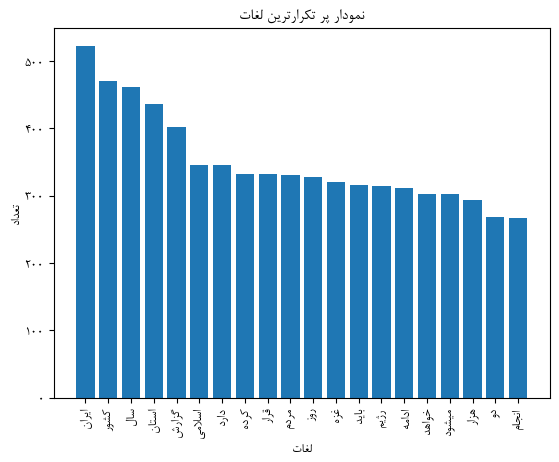

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import arabic_reshaper
from bidi.algorithm import get_display
font_path = '/home/aac/Desktop/HW1/B-NAZANIN.TTF'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'B Nazanin'
# Use the font file in Matplotlib
def prepare_arabic_text(text):
    return get_display(arabic_reshaper.reshape(u'%s' % str(text)))

numbers = top_twenty_news_words_rdd.map(lambda tup: tup[0]).collect()

words = top_twenty_news_words_rdd.map(lambda tup: tup[1]).collect()
words = [prepare_arabic_text(word) for word in words]

# Plot the bar chart using Matplotlib
plt.bar(words, numbers)
plt.xlabel(prepare_arabic_text('لغات'))
plt.xticks(rotation=90)
plt.ylabel(prepare_arabic_text('تعداد'))
plt.title(prepare_arabic_text('نمودار پر تکرارترین لغات'))
plt.show()

In [10]:
import math
def custom_keywords_flat_map(x):
    if "keywords" in x:
        return x['keywords']
    else:
        return []
keywords_rdd = processed_news_rdd.flatMap(custom_keywords_flat_map) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x + y) \
.map(lambda x: (x[1], x[0])) \
.map(lambda x: (2**(math.log10(x[0])), x[1])) \
.sortByKey(ascending=False)

maximum_score = keywords_rdd.take(1)[0][0]
normalized_keywords_rdd = keywords_rdd.map(lambda x: (x[0]/maximum_score, x[1])) 


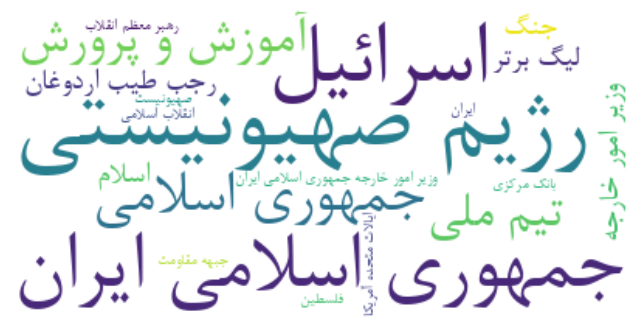

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_score_dict = {tup[1]: tup[0] for tup in normalized_keywords_rdd.take(20)}

wordcloud = WordCloud(font_path=font_path, background_color='white').generate_from_frequencies(word_score_dict)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

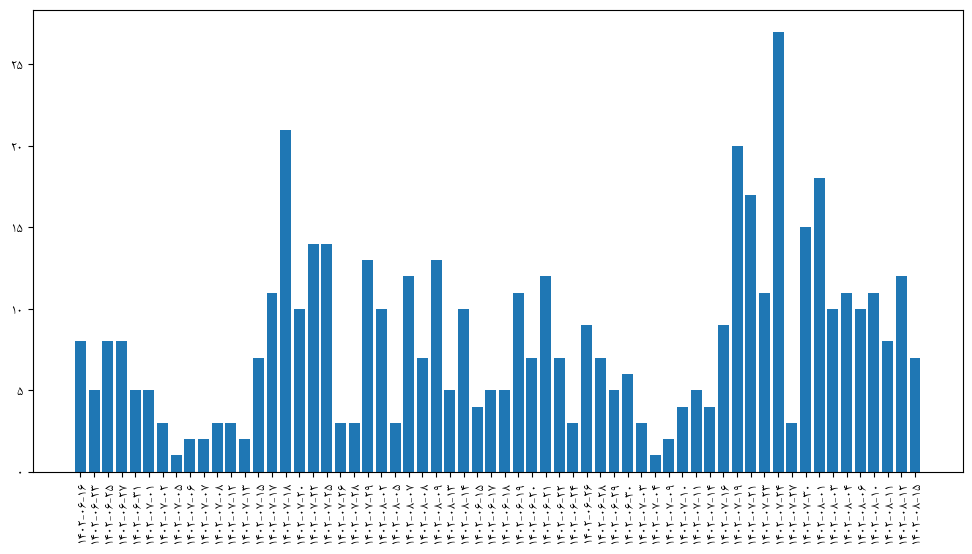

In [12]:
from datetime import datetime
import matplotlib.pyplot as plt
from khayyam import JalaliDatetime
persian_datetime = JalaliDatetime.fromtimestamp(float(1699171008))
persian_datetime.strftime('%Y-%m-%d')
def timestamp_to_persian_date(timestamp):
    # return datetime.utcfromtimestamp(float(timestamp)).strftime('%Y-%m-%d')
    persian_datetime = JalaliDatetime.fromtimestamp(float(timestamp))
    return persian_datetime.strftime('%Y-%m-%d')

news_published_dates_rdd = processed_news_rdd.map(lambda x: x['date_published']) \
.map(lambda x: (x, 1)) \
.sortByKey() \
.map(lambda x: timestamp_to_persian_date(x[0])) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x+y)
published_news_count = news_published_dates_rdd.map(lambda tup: tup[1]).collect()
dates = news_published_dates_rdd.map(lambda tup: tup[0]).collect()
plt.figure(figsize=(12, 6))
plt.bar(dates, published_news_count, width=0.8)
plt.xticks(rotation=90)
plt.show()



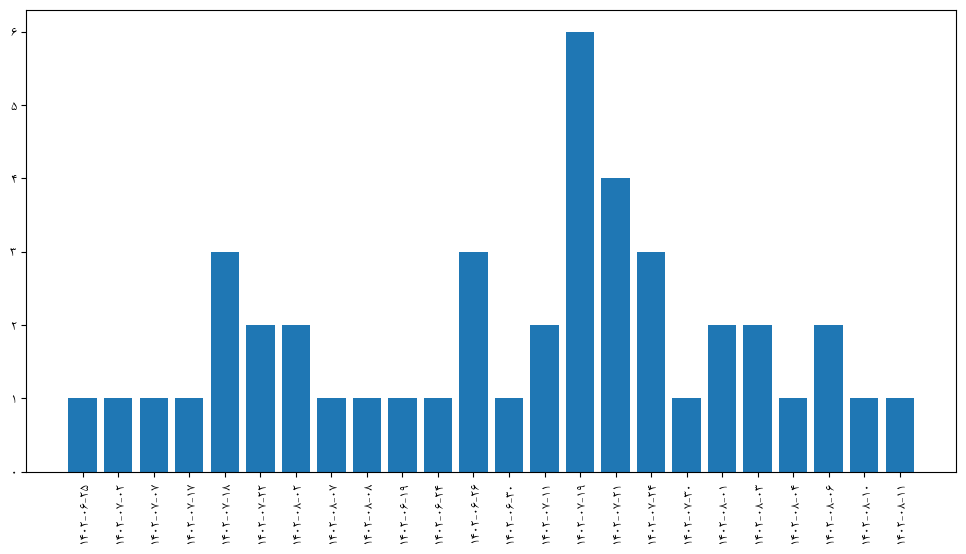

In [13]:
list_of_words_in_wordcloud = [word[1] for word in normalized_keywords_rdd.take(100)]
def check_keyword_in_wordcloud(x):
    if "keywords" in x:
        keywords = x['keywords']
        for keyword in keywords:
            if keyword in list_of_words_in_wordcloud:
                return True
            else:
                return False
    else:
        return False

processed_news_contain_wordcloud_rdd = processed_news_rdd.filter(check_keyword_in_wordcloud) \
.map(lambda x: x['date_published']) \
.map(lambda x: (x, 1)) \
.sortByKey() \
.map(lambda x: timestamp_to_persian_date(x[0])) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x+y)
published_wordcloud_news_count = processed_news_contain_wordcloud_rdd.map(lambda tup: tup[1]).collect()
dates = processed_news_contain_wordcloud_rdd.map(lambda tup: tup[0]).collect()
plt.figure(figsize=(12, 6))
plt.bar(dates, published_wordcloud_news_count, width=0.8)
plt.xticks(rotation=90)
plt.show()

# Section 4: Son, A-prior algorithm
- In this section we want to find 3-sets words collections that appear together the most.
    - What is your idea to solve the problem?
    - Implement an algorithm for doing so.
    - What is the most pertinant 3-sets words?
- Now we want to test the results and know that how valid is the model.
    - How we can test the model?
    - Explain and implement a scenario to test the model with using `tf-idf`.

In [14]:
# TODO: Find Frequent Words
all_single_words_rdd = processed_news_rdd.flatMap(lambda x: x['body'].split(" "))
all_single_words_count_rdd = all_single_words_rdd.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y : x+y) \
.sortBy(lambda x: x[1], ascending=False)

number_of_total_words = all_single_words_count_rdd.map(lambda x: x[1]).reduce(lambda x, y : x+y)


# TODO: Move on the whole text with a 2-words frame.
# TODO: Find frequent 2-words frames. 

In [15]:
def filter_single_word_based_on_threshold(x, threshold):
    if x[1]/number_of_total_words > threshold:
        return True
    else:
        return False
threshold = 0.001
frequent_single_words_rdd = all_single_words_count_rdd.filter(lambda x: filter_single_word_based_on_threshold(x, threshold))
frequent_single_words_list = [tup[0] for tup in frequent_single_words_rdd.collect()]


In [16]:
def generate_word_pairs(x):
    if len(x) < 2:
        return []
    else:
        return [(x[i], x[i+1]) for i in range(len(x)-1)]
def select_double_words(x):
    if x[0] in frequent_single_words_list and x[1] in frequent_single_words_list:
        return True
    else:
        return False

condidate_double_words_rdd = processed_news_rdd.map(lambda x: x['body'].split(" ")) \
.flatMap(generate_word_pairs) \
.filter(select_double_words) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x+y) \
.sortBy(lambda x: x[1], ascending=False)

number_of_total_pair_words = condidate_double_words_rdd.map(lambda x: x[1]).reduce(lambda x, y : x+y)


In [17]:
threshold = 0.002
def apply_filter (x, threshold):
    if x[1]/number_of_total_pair_words > threshold:
        return True
    else:
        return False
frequent_double_words_rdd = condidate_double_words_rdd.filter(lambda x: apply_filter(x, threshold))
frequent_double_words_list = [tup[0] for tup in frequent_double_words_rdd.collect()]


In [18]:
def generate_word_triples(x):
    if len(x) < 3:
        return []
    else:
        return [(x[i], x[i+1], x[i+2]) for i in range(len(x)-2)]
def select_triple_words(x):
    if (x[0] in frequent_single_words_list and (x[1], x[2]) in frequent_double_words_list) or \
        (x[2] in frequent_single_words_list and (x[0], x[1]) in frequent_double_words_list):
        return True
    else:
        return False

condidate_triple_words_rdd = processed_news_rdd.map(lambda x: x['body'].split(" ")) \
.flatMap(generate_word_triples) \
.filter(select_triple_words) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x+y) \
.sortBy(lambda x: x[1], ascending=False)

number_of_total_triple_words = condidate_triple_words_rdd.map(lambda x: x[1]).reduce(lambda x, y : x+y)


In [19]:
threshold = 0.01
def apply_filter (x, threshold):
    if x[1]/number_of_total_triple_words > threshold:
        return True
    else:
        return False
frequent_triple_words_rdd = condidate_triple_words_rdd.filter(lambda x: apply_filter(x, threshold))
frequent_triple_words_list = [tup[0] for tup in frequent_triple_words_rdd.collect()]
number_of_frequency_of_triple_words = [tup[1] for tup in frequent_triple_words_rdd.collect()]
joined_triple_frequent_words = []

for i in range(len(frequent_triple_words_list)):
    joined_triple_frequent_words.append(" ".join(frequent_triple_words_list[i]))    


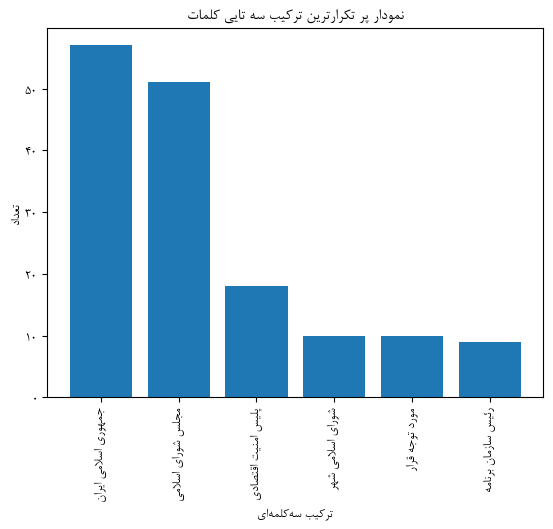

In [20]:
triple_frequent_words = [prepare_arabic_text(word) for word in joined_triple_frequent_words]

# Plot the bar chart using Matplotlib
plt.bar(triple_frequent_words, number_of_frequency_of_triple_words)
plt.xlabel(prepare_arabic_text('ترکیب سه‌کلمه‌ای'))
plt.xticks(rotation=90)
plt.ylabel(prepare_arabic_text('تعداد'))
plt.title(prepare_arabic_text('نمودار پر تکرارترین ترکیب سه تایی کلمات'))
plt.show()

In [21]:
#########################################Method2#########################################
from itertools import combinations

def find_term_frequency_for_one_document(x):
    words = x[0]['body'].split(" ")
    id = x[0]['uid']
    return [((word, id), 1/x[1]) for word in words]

def process_group(group):
    key, values = group
    # Your operations on each group go here
    result = list(values) # For example, converting values to a list
    return result

def sort_tfs_and_generate_triples(x):
    sorted_tuples = sorted(x, key=lambda x: x[1][1], reverse=True)
    temp =  sorted_tuples[:8] # This number is very important and shows how many words should choose from each document
    words = [word[1][0] for word in temp]
    # print(list(combinations(words, 3)))
    return list(combinations(words, 3))
    # return list(combinations(words, 3))

triple_frequent_body_words = processed_news_rdd.map(lambda x: (x, len(x['body'].split(" ")))) \
.flatMap(find_term_frequency_for_one_document) \
.reduceByKey(lambda x, y: x+y) \
.map(lambda x: (x[0][1], (x[0][0], x[1]))) \
.groupBy(lambda x: x[0]) \
.map(process_group) \
.flatMap(sort_tfs_and_generate_triples) \
.map(lambda x: (tuple(sorted(x)), 1)) \
.reduceByKey(lambda x, y: x + y) \
.sortBy(lambda x: x[1], ascending=False).collect()

In [22]:
triple_frequent_body_words_list= []
for element in triple_frequent_body_words[:5]:
    triple_frequent_body_words_list.append(element[0])

triple_frequent_body_words_list

[('اسلامی', 'ایران', 'جمهوری'),
 ('رژیم', 'صهیونیستی', 'غزه'),
 ('رژیم', 'صهیونیستی', 'فلسطین'),
 ('رژیم', 'غزه', 'نوار'),
 ('حمله', 'زمینی', 'غزه')]

In [23]:
import math
word1 = "رژیم"
word2 = "صهیونیستی"
word3 = "فلسطین"
N = 50
def update_index(x, word):
    is_exist = 0
    counter = 0
    words = x['body'].split(" ")
    number_of_words_in_each_document = len(words)
    for w in words:
        if word == w:
            is_exist = 1
            counter = counter + 1
    return (x['uid'], is_exist, counter/number_of_words_in_each_document, 1)



# The second elment of tuple shows whether the word is in the document or not
# The third element of tuple shows number of repetition of the word in the document
# The forth element of tuple for counting total number of documents
tf_idf_list= []
for word in [word1, word2, word3]:
    word_rdd = processed_news_rdd.map(lambda x : update_index(x, word)) 
    total_number_of_documents = word_rdd.map(lambda x: x[3]).reduce(lambda x,y: x+y)
    number_of_documents_in_which_word_exists = word_rdd.map(lambda x: x[1]).reduce(lambda x,y: x+y)
    idf_term = math.log(1 + total_number_of_documents/number_of_documents_in_which_word_exists)

    tf_idf_vector = word_rdd.map(lambda x: (x[0], x[2]*idf_term)).sortBy(lambda x: x[1], ascending=False)
    tf_idf_list.append(tf_idf_vector.take(N))
tf_idf_list
counter1 = 0 # Between word1 & word2
counter2 = 0 # Between word1 & word3
counter3 = 0 # Between word2 & word3
counter4 = 0 # Between word1 & word2 & word3
for i in range(1, N):
    if tf_idf_list[0][i][0] == tf_idf_list[1][i][0]:
        counter1 = counter1 + 1
    if tf_idf_list[0][i][0] == tf_idf_list[2][i][0]:
        counter2 = counter2 + 1
    if tf_idf_list[1][i][0] == tf_idf_list[2][i][0]:
        counter3 = counter3 + 1
    if tf_idf_list[0][i][0] == tf_idf_list[2][i][0] and tf_idf_list[0][i][0] == tf_idf_list[1][i][0] \
          and tf_idf_list[1][i][0] == tf_idf_list[2][i][0]:
        counter4 = counter4 + 1        
    
print("Similarity values:")
print(f"Between word1 & word2: {counter1}")
print(f"Between word1 & word3: {counter2}")
print(f"Between word2 & word3: {counter3}")
print(f"Between word1 & word2 & word3: {counter4}")

Similarity values:
Between word1 & word2: 1
Between word1 & word3: 3
Between word2 & word3: 0
Between word1 & word2 & word3: 0
